## Finding a Home in King County
### Client-Focused Data Analysis

<img src="optional/bellevue_fall_lnb6qm.webp" width="600">

## Client Description

<img src="optional/ad4bac92-7e48-410a-97ac-73a6342164fb.jpg" width="300">

- Thomas Hansen wants to buy a house
- He has 5 kids
- Is on a very tight budget
- Wants a nice social neighborhood
- Is wondering when and where to buy

### Key Assumptions

1. House for 6 people needs *at least* 3 bedrooms and 2 bathrooms.
2. Social neighborhoods are characterized by *low fluctuation*.


## Setup

In [11]:
# Importing packages and setup
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium

# Plotting settings
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
sns.set(rc = {'figure.figsize':(16, 8)})

## Data Exploration

In [12]:
# Importing the data and having a first look
df = pd.read_csv('data/eda.csv',index_col=False)

# Dropping id.1 because it is identical to house_id, renaming for less confusion
df.drop("id.1", axis="columns", inplace=True, errors="ignore")
df.rename(columns={"id": "sales_id"}, inplace=True)

# Correcting yr_renovated column
df["yr_renovated"] = df["yr_renovated"].multiply(1/10)
df["yr_renovated"].replace(0, np.nan, inplace=True)

#  Changing data type to int
df[["bedrooms","floors","view","condition","yr_built","grade","zipcode"]] = df[["bedrooms","floors","view","condition","yr_built","grade","zipcode"]].astype("int", errors="ignore")

# Changing date and years to datetime
df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d')
df["yr_built"] = pd.to_datetime(df["yr_built"],format='%Y').dt.strftime('%Y').astype("int")

# Dropping duplicate rows and some columns for presentation
df.drop_duplicates(inplace=True)
display(df.drop(["sales_id","yr_built"],axis=1,inplace=False))

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,1180.000,0.000,NaN,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,400.000,1991.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,770.000,0.000,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,1050.000,910.000,NaN,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,1680.000,0.000,NaN,98074,47.617,-122.045,1800.000,7503.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.000,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,1530.000,0.000,NaN,98103,47.699,-122.346,1530.000,1509.000
21593,2015-02-23,400000.000,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,2310.000,0.000,NaN,98146,47.511,-122.362,1830.000,7200.000
21594,2014-06-23,402101.000,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,1020.000,0.000,NaN,98144,47.594,-122.299,1020.000,2007.000
21595,2015-01-16,400000.000,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,1600.000,0.000,NaN,98027,47.535,-122.069,1410.000,1287.000


| **Attribute** | **Description** |
| --- | --- |
| id | Unique identifier for a house |
| dateDate | Date house was sold |
| pricePrice | Prediction target (house price) |
| bedroomsNumber | Number of bedrooms in the house |
| bathroomsNumber | Number of bathrooms in the house |
| sqft_livingSquare | Footage of the home |
| sqft_lotSquare | Footage of the lot |
| floorsTotal | Total number of floors in the house |
| waterfront | Whether the house has a waterfront view |
| view | Quality of the view |
| condition | Overall condition of the house |
| grade | Overall grade given to the housing unit (King County grading system) |
| sqft_aboveSquare | Square footage of the house above basement |
| sqft_basementSquare | Square footage of the basement |
| yr_builtYear | Built year of the house |
| yr_renovatedYear | Year when the house was renovated |
| zipcodeZip | Zip code of the house location |
| latLatitude | Latitude coordinate of the house location |
| longLongitude | Longitude coordinate of the house location |
| sqft_living15Square | Square footage of interior living space for nearest 15 neighbors |
| sqft_lot15Square | Footage of land lots for nearest 15 neighbors |

## Client-Focused Data Analysis

1. *When* should our client buy?
2. *Where* should our client buy?
3. *What* should our client buy?

### When to buy?

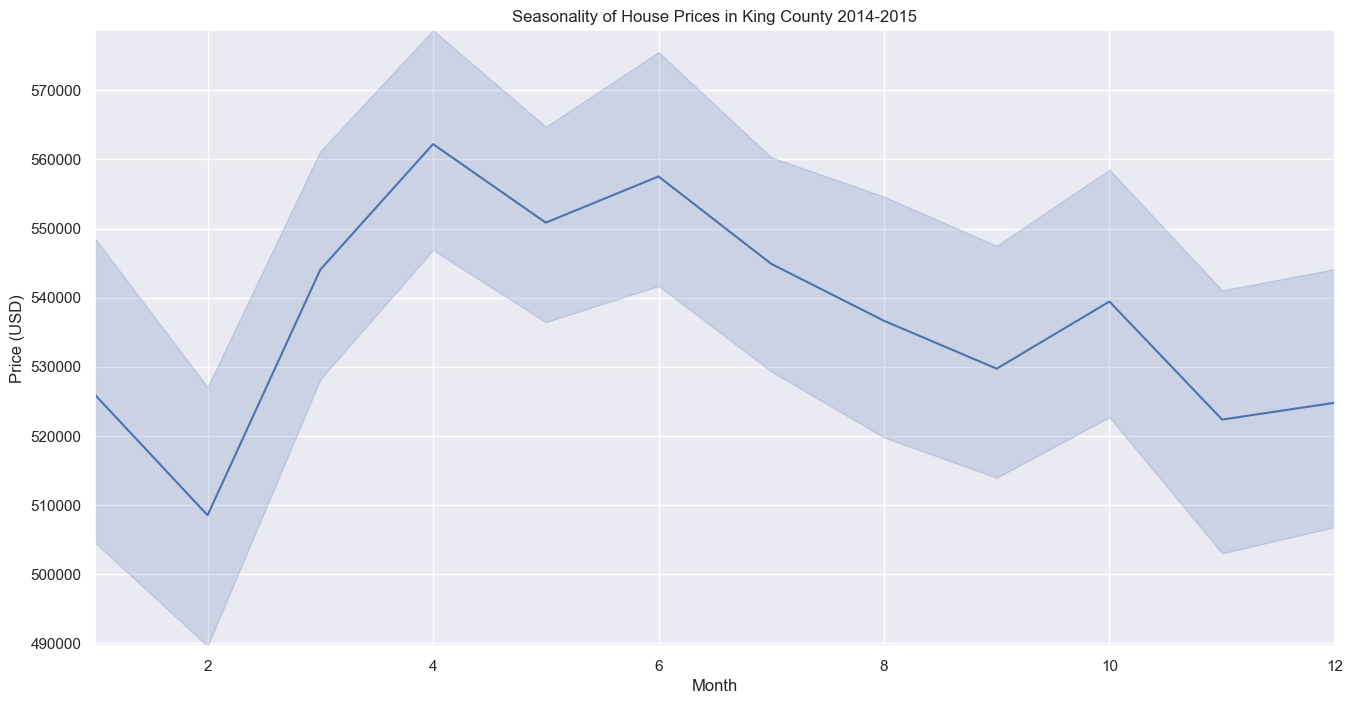

In [13]:
# Checking for seasonality of house prices
ax = sns.lineplot(df, y = "price", x= df['date'].dt.strftime('%m').astype("int"))
ax.set(xlabel='Month', ylabel='Price (USD)', title="Seasonality of House Prices in King County 2014-2015");
ax.margins(0,0)

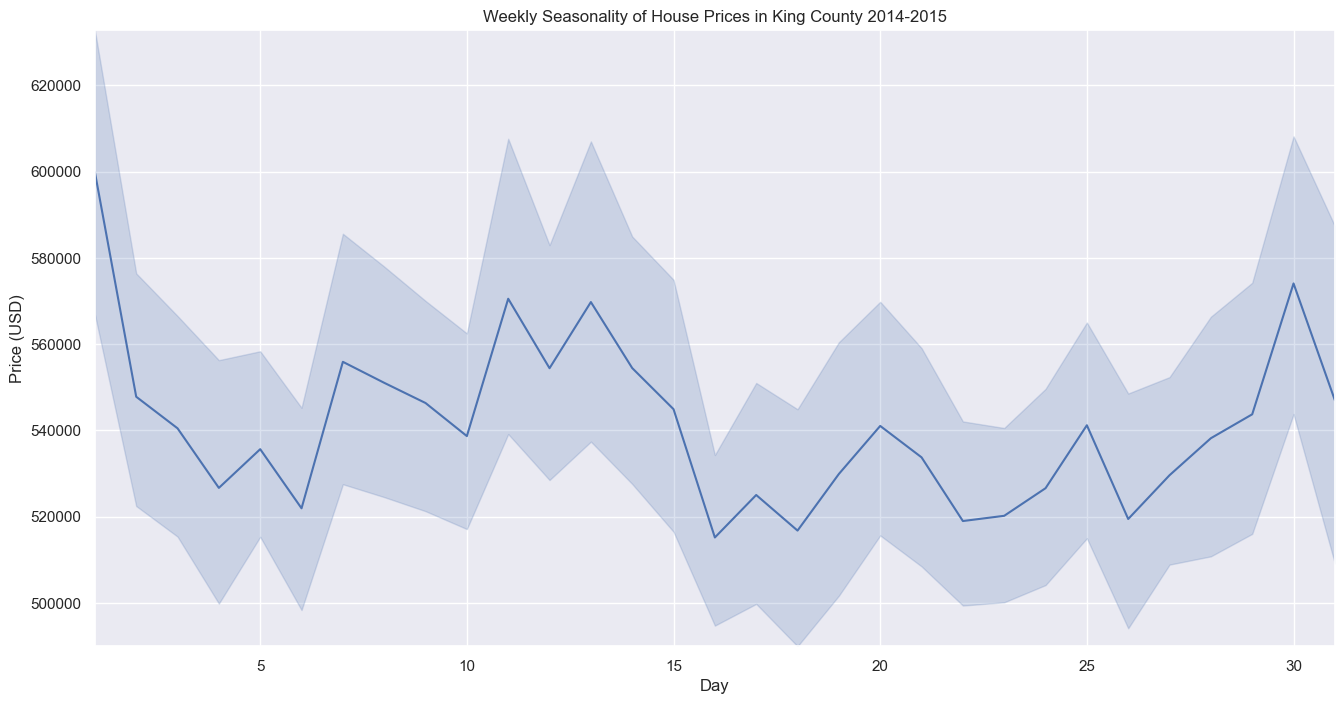

In [14]:
# Checking for weekly seasonality of house prices
ax = sns.lineplot(df, y = "price", x= df['date'].dt.strftime('%d').astype("int"))
ax.set(xlabel='Day', ylabel='Price (USD)', title="Weekly Seasonality of House Prices in King County 2014-2015");
ax.margins(0,0)

### Where to buy?

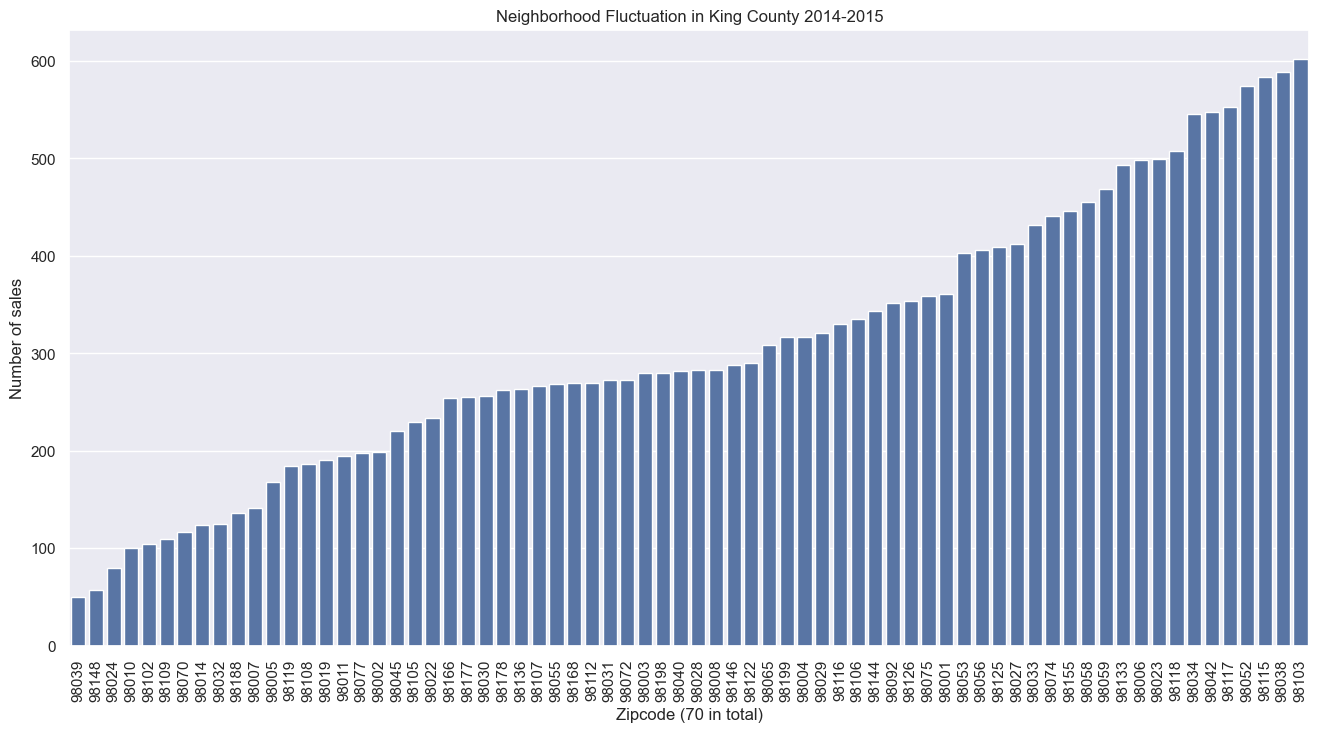

In [15]:
# Grouping by zipcode and sorting by fluctuation
group_by_zip = df.groupby("zipcode")
zipcodes_by_fluctuation = group_by_zip["zipcode"].count().sort_values()

# Create dictionary for mapping
dict(zipcodes_by_fluctuation)
df.insert(0,"zip_fluctuation",df["zipcode"].map(zipcodes_by_fluctuation))

# Plotting
ax = sns.barplot(ax = sns.barplot(y=zipcodes_by_fluctuation, x=zipcodes_by_fluctuation.index.astype("str")))
ax.set(ylabel='Number of sales', xlabel='Zipcode (70 in total)', title="Neighborhood Fluctuation in King County 2014-2015");
ax.xaxis.set_tick_params(rotation=90)

### What to buy?

Methodology:

- Start with most affordable house with at least 3 bedrooms and 2 bathrooms
- Would you pay for lower fluctuation?

In [16]:
# Filter for houses with at least 3 bedrooms and 2 bathrooms
df_bed_bath = df[(df["bathrooms"]>= 2) & (df["bedrooms"]>=3)]
df_bed_bath_sorted_by_price = df_bed_bath.sort_values("price").head(5)
suggestions = df_bed_bath_sorted_by_price.drop(["date","sales_id","sqft_living15","sqft_lot15"], axis=1)
display(suggestions)

,zip_fluctuation,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
15796,507,133000.000,7129304540,5.000,2.000,1430.000,5600.000,1.500,0.000,0.000,3,6,1430.000,0.000,1947,NaN,98118,47.519,-122.266
15130,288,147400.000,1823049182,3.000,2.000,1080.000,9225.000,1.000,0.000,0.000,2,7,1080.000,0.000,1955,NaN,98146,47.484,-122.346
13215,262,150000.000,2976800749,4.000,2.000,1460.000,7254.000,1.000,0.000,0.000,3,6,1460.000,0.000,1959,NaN,98178,47.506,-122.254
15962,361,154000.000,3356403304,3.000,3.000,1530.000,9997.000,1.000,0.000,0.000,3,6,1020.000,510.000,1992,NaN,98001,47.286,-122.252
5402,507,158000.000,7129300595,3.000,2.000,1090.000,6090.000,1.000,0.000,0.000,3,7,940.000,150.000,1940,NaN,98118,47.512,-122.259


### Candidate Locations

In [17]:
# Geoplot

data = suggestions
# Create a map centered around the average latitude and longitude
center_lat = data['lat'].mean()
center_lon = data['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
for _, row in data.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
       # popup=row['name']
    ).add_to(m)

# Save the map to an HTML file
m.save("csv_map.html")


# Display the map in a Jupyter notebook (optional)
m

## Client Recommendations

1. Buy in February, avoid spring or summer. Go for the middle of the week.
2. Look for low-fluctuation neighborhoods, community spirit needs time and trust.
3. Buying suggestions: house in Rainier Beach with 5 bedrooms for 133,000 USD.

## Bonus: Taking a Look

<iframe src="https://www.google.com/maps/embed?pb=!4v1721028173308!6m8!1m7!1sB3FjASEL1Nz9h7h-oUlEuA!2m2!1d47.51901947760249!2d-122.265698581049!3f62.09543600000001!4f0!5f0.7820865974627469" width="900" height="500" style="border:0;" allowfullscreen="" loading="lazy" referrerpolicy="no-referrer-when-downgrade"></iframe>